In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Download data from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset#

In [90]:
df_TrueNews = pd.read_csv('data/train/True.csv', sep=",")
df_TrueNews["labels"]="Real"
df_TrueNews.head()

,title,text,subject,date,labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [91]:
df_FakeNews = pd.read_csv('data/train/Fake.csv', sep=",")
df_FakeNews["labels"]="Fake"
df_FakeNews.head()

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [92]:
df_FakeNews.shape

(23481, 5)

In [93]:
df_TrueNews.shape

(21417, 5)

In [94]:
df_AllNews = df_FakeNews.append(df_TrueNews)
df_AllNews.shape

(44898, 5)

In [95]:
df_AllNews.head()

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [96]:
df_AllNews.to_csv('data/train/all_news.csv', index = False)

In [97]:
data_available = [
    'title','text','subject','date','labels'
]
X = df_AllNews[data_available]
y = df_AllNews[data_available]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [99]:
#X_train.to_csv('data/train/news_train.csv', index = False)
#X_test.to_csv('data/train/news_test.csv', index = False)

In [100]:
#X_train = pd.read_csv('data/train/news_train.csv', sep=",")
X_train = pd.read_csv('news_train.csv', sep=",")
y_train = X_train['labels']
X_train.head()

,title,text,subject,date,labels
0,U.S. House panel offers alternative to retirem...,WASHINGTON (Reuters) - Legislation to bypass t...,politicsNews,"February 3, 2016",Real
1,THE SMARTEST WOMAN In Politics: “How Trump Can...,Monica Crowley offers some of the most brillia...,left-news,"Sep 22, 2016",Fake
2,CNN CLOWN Who Cries About “FAKE NEWS” Uses Unv...,The video featured a Youtube prankster named A...,politics,"Dec 23, 2016",Fake
3,NAACP CHIEF Asks BLM Rioters To “Show up en ma...,Put down the bricks and vote! Hmmm I wonder if...,politics,"Jul 10, 2016",Fake
4,Possible Putin-Trump meeting in Vietnam still ...,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 9, 2017",Real


(array([0, 1]), [Text(0, 0, 'Fake'), Text(1, 0, 'Real')])

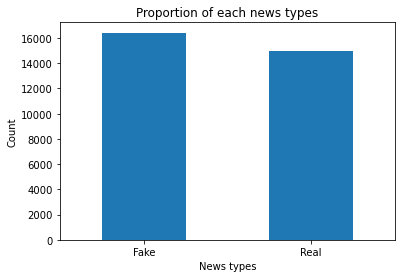

In [101]:
import matplotlib.pyplot as plt
X_train['labels'].value_counts().plot(kind='bar',
title="Proportion of each news types")
plt.ylabel('Count')
plt.xlabel('News types')
plt.xticks(rotation=0)

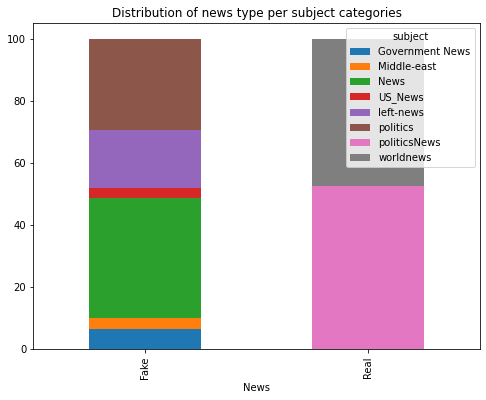

In [102]:
from process_data import plot_marginal_distribution
plot_marginal_distribution(
X_train.rename(columns={'labels': 'News'}),
var1='subject',
var2='News',
title='Distribution of news type per subject categories')

In [103]:
import warnings
warnings.filterwarnings('ignore')
# after this command, restart the Kernel if necessary
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns

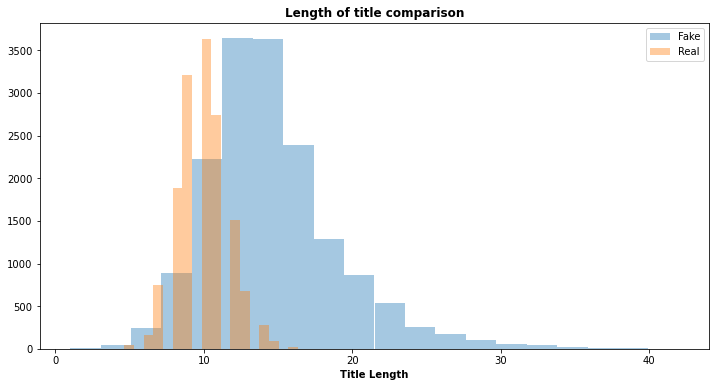

In [104]:
plt.figure(figsize=(12,6))
X_train['title_length'] = X_train['title'].apply(lambda x :
len(x.strip().split()))
sns.distplot(X_train[X_train['labels'] ==
'Fake']['title_length'],
kde=False, label='Fake', bins=20)
sns.distplot(X_train[X_train['labels'] ==
'Real']['title_length'],
kde=False, label='Real', bins=20)
plt.xlabel('Title Length', weight='bold')
plt.title('Length of title comparison', weight='bold')
plt.legend()
plt.show()

In [105]:
import re
def remove_special_characters(text):
    """ remove special characters from text """
    delete_chars = "[]()@''+&'"
    space_chars = "_.-"
    table = dict((ord(c), " ") for c in space_chars)
    table.update(dict((ord(c), None) for c in delete_chars))
    return text.translate(table)

In [106]:
def text_pre_processing(text, stop_words=True):
    """ remove special characters, hyperlinks, and lowercase everything """
    # remove hyperlinks
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text.lower(),
    flags=re.MULTILINE)
    text = re.sub('<[^>]*>', '', text)
    # remove custom special characters from our text
    cleaned_text = remove_special_characters(text)
    return cleaned_text

In [107]:
train_corpus = [text_pre_processing(text) for text in X_train['text']]

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8, strip_accents='unicode')
features = tf_idf_vectorizer.fit_transform(train_corpus)

In [109]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=12,class_weight='balanced')
# Train the model
y_train = [1 if x == 'Real' else 0 for x in y_train]
classifier = classifier.fit(features, y_train)

In [110]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

#X_test = pd.read_csv('data/train/news_test.csv', sep=",")
X_test = pd.read_csv('news_test.csv', sep=",")
y_test = [1 if x == 'Real' else 0 for x in X_test['labels']]
test_corpus = [text_pre_processing(text) for text in
X_test['text']]

In [111]:
X_test = tf_idf_vectorizer.transform(test_corpus)

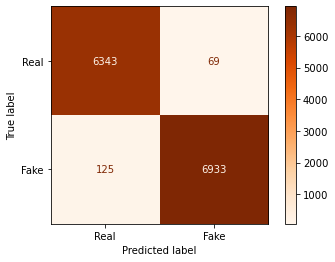

In [112]:
y_preds = classifier.predict(X_test)
class_names = ['Real', 'Fake']
disp = plot_confusion_matrix(classifier, X_test,
y_test, display_labels=class_names,
cmap=plt.cm.Oranges,
normalize=None, values_format='.0f',
labels=[1, 0])

In [113]:
import pickle
with open('./webservice/static/news_verification_model.pkl', 'wb') as stream:
    pickle.dump(classifier, stream)
with open('./webservice/static/tfidf_feature_extractor.pkl', 'wb') as stream:
    pickle.dump(tf_idf_vectorizer, stream)